# Plotting Soundings From Custom Data Sources

------

### **Have data that you want to plot on SounderPy plots, but it's not native to SounderPy? Here's a way to do so!**

**This notebook will provide some instructions for getting custom data sources into SounderPy-friendly formats so you can use your data on SounderPy plots.**

**First, please be sure to read up on SounderPy documentation, specifically the section "What does the data look like?". Here you can find specific details about the data structure (using a Python `dict`) that SounderPy plots ingest.**

Check it Out: *https://kylejgillett.github.io/sounderpy/gettingdata.html#what-does-the-data-look-like*

-------------------

First, let's investigate SounderPy plot functions, such as `build_sounding()`: 

- **`spy.build_sounding(clean_data, style='full', save=False, filename='sounderpy_sounding', color_blind=True, dark_mode=False)`**

    + SounderPy plots need a variable called `clean_data`. This is a Python dictionary of vertical profile data and profile metadata.
    + This `dict` has two main sections, the actual profile data and the metadata of the profile's location. 
    + You'll need to create one of these dictionaries out of your data, following the same structure.
    
    
    
- **The profile data this `dict` contains...**

    + ``clean_data['p']``: an `array` of pressure data
    + ``clean_data['z']``: an `array` of height data
    + ``clean_data['T']``: an `array` of temperature data
    + ``clean_data['Td']``: an `array` of dewpoint data
    + ``clean_data['u']``: an `array` of u-component of wind data 
    + ``clean_data['v']``: an `array` of v-component of wind data
    
    
    
- **The profile metadata this `dict` contains (via `clean_data['site_info']`)...**

    + ``clean_data['site_info']['site-name']`` 
         - a `str` representing the name of a profile site, if available (e.g. 'DTX')
    + ``clean_data['site_info']['site-lctn']`` 
         - a `str` representing additional site location information (e.g. 'MI US')
    + ``clean_data['site_info']['site-latlon']`` 
         - a latitude-longitude pair of `floats` in a `list`
    + ``clean_data['site_info']['site-elv']`` 
         - elevation of the profile 
    + ``clean_data['site_info']['source']`` 
         - a `str` representing the data source name (e.g. 'RAOB OBSERVED PROFILE')
         - other sources are... 'ACARS OBSERVED AIRCRAFT PROFILE', 'BUFKIT FORECAST PROFILE', 'MODEL REANALYSIS PROFILE', 'RAOB OBSERVED PROFILE'
    + ``clean_data['site_info']['model']`` 
         - a `str` representing the model name, if available (e.g., 'no-model' or 'hrrr')
    + ``clean_data['site_info']['fcst-hour']`` 
         - if a model is used, the forecast hour of the model run as a `str` (e.g. 'no-fcst-hour' or 'F01')
    + ``clean_data['site_info']['run-time']`` 
         - if a model is used, the model run time as a `list` of `strs`
    + ``clean_data['site_info']['valid-time']`` 
         - the data's valid time as a `list` of `strs`


**Below is an example**:

     {'p': array([944. , 926.4, 925. , 894.5, 863.5, 850. , 848. , 833.4, 804.1,
             795. , 775.7, 774. , 748. , 721.2, 720. , 700. , 685. , 674. ,
             670. , 651. , 645.1, 630. , 621.3, 621. , 598.2, 591. , 587. ,
             583. , 572. , 554. , 509. , 500. , 473.6, 471. , 446. , 442. ,
             425. , 418. , 402. , 400. , 399. , 395. , 386. , 382. , 370. ,
             354.7, 354. , 336. , 311.2, 300. , 297. , 279. , 250. , 241. ,
             239. , 237.6, 232. , 200. , 194. , 190. , 188. , 170. , 168.9,
             165. , 162. , 161. , 160.6, 155. , 152.8, 150. , 138.2, 135. ,
             131.3, 131. , 130. , 127. , 125. , 124.8, 122. , 118.7, 118. ,
             113. , 112. , 111. , 108. , 103. , 102. , 101. , 100. ]) <Unit('hectopascal')>,
      'z': array([  446,   610,   623,   914,  1219,  1356,  1376,  1524,  1829,
              1926,  2134,  2152,  2438,  2743,  2757,  2990,  3168,  3300,
              3349,  3584,  3658,  3850,  3962,  3966,  4267,  4364,  4419,
              4473,  4625,  4877,  5542,  5680,  6096,  6137,  6550,  6617,
              6911,  7035,  7323,  7360,  7378,  7452,  7620,  7696,  7925,
              8230,  8243,  8612,  9144,  9400,  9470,  9900, 10640, 10880,
             10935, 10973, 11128, 12070, 12260, 12389, 12454, 13067, 13106,
             13246, 13356, 13394, 13411, 13628, 13716, 13830, 14326, 14466,
             14630, 14645, 14690, 14831, 14927, 14935, 15075, 15240, 15278,
             15544, 15599, 15655, 15826, 16123, 16184, 16247, 16310]) <Unit('meter')>,
      'T': array([ 26. ,  24.3,  24.2,  21.7,  19.2,  18. ,  17.4,  16.4,  14.3,
              13.6,  13.4,  13.4,  10.9,   8.3,   8.2,   6.4,   5.2,   5.8,
               6. ,   4.2,   3.6,   2. ,   2.4,   2.4,   0.2,  -0.5,  -0.7,
              -0.5,  -0.9,  -3.1,  -9.1, -10.3, -14.1, -14.5, -16.9, -16.7,
             -19.1, -19.7, -22.3, -22.5, -22.5, -22.5, -23.9, -24.5, -26.7,
             -29.6, -29.7, -32.7, -36.1, -37.7, -37.9, -41.1, -47.1, -49.3,
             -49.5, -49.8, -51.1, -59.3, -61.3, -62.3, -62.9, -68.1, -68.3,
             -68.9, -68.3, -63.9, -63.8, -62.1, -62.8, -63.7, -68.5, -69.9,
             -70.3, -70.3, -68.1, -66.5, -65.3, -65.3, -65.3, -63.8, -63.5,
             -62.9, -61.9, -60.5, -59.1, -58.7, -57.5, -55.3, -55.3]) <Unit('degree_Celsius')>,
      'Td': array([ 17. ,  16.3,  16.2,  15.6,  15. ,  14.7,  14.8,  14.2,  13. ,
              12.6,  10. ,   9.8,   8.7,   7.5,   7.4,   5.3,   4.1,  -1.2,
              -3. ,  -3.8,  -3.6,  -3. ,  -4.5,  -4.6,  -4.4,  -4.3,  -5.3,
              -8.5, -12.9, -14.1, -17.1, -17.3, -17.4, -17.4, -20.1, -22.7,
             -26.1, -29.7, -31.3, -31.5, -31.5, -35.5, -37.6, -38.5, -36.8,
             -34.5, -34.4, -36.4, -39.8, -41.4, -41.5, -45.7, -50.8, -53. ,
             -54.3, -54.7, -56.1, -64.3, -66.3, -67.3, -66.9, -72. , -72.2,
             -72.9, -72.5, -68.5, -68.4, -67.1, -67.8, -68.7, -73.5, -74.9,
             -75.3, -75.3, -74.1, -74.5, -74.3, -74.4, -76.3, -76.5, -76.5,
             -78.9, -78.9, -78.5, -79.1, -83.7, -83.5, -83.3, -83.3]) <Unit('degree_Celsius')>,
      'u': array([ 10.7246222 ,  10.60660172,  10.60660172,  17.        ,
              22.36948102,  26.99707961,  26.99707961,  27.63986722,
              31.81980515,  34.37362398,  39.83431104,  39.83431104,
              42.13244437,  45.05336244,  45.05336244,  39.83431104,
              39.99960775,  40.12982058,  40.22445359,  40.28302882,
              40.30508653,  40.30508653,  40.30508653,  40.30508653,
              55.92124435,  56.73165519,  56.73165519,  57.52478501,
              57.50175672,  58.97894719,  60.00171105,  60.62177826,
              64.08587988,  64.08587988,  58.51531863,  58.51531863,
              55.35225748,  53.05840464,  49.9682747 ,  49.9682747 ,
              49.9682747 ,  48.32997061,  44.23421039,  43.93899135,
              44.16729559,  50.78742675,  50.78742675,  50.78742675,
              51.60657879,  51.09549882,  51.09549882,  53.85980316,
              57.09739058,  55.28477501,  54.37846722,  54.37846722,
              55.28477501,  61.62892952,  64.34785288,  67.06677624,
              67.97308403,  77.94246969,  78.84877747,  91.15018422,
              99.6074178 , 102.42649567, 102.42649567,  80.39200027,
              71.59831518,  69.53725394,  67.61480784,  52.13005469,
              33.7059555 ,  34.47199994,  37.03650542,  45.28821067,
              51.09549882,  51.09549882,  45.033321  ,  37.23909236,
              37.60864741,  37.74069899,  38.27679749,  37.58770483,
              37.48920614,  36.5444686 ,  36.63991854,  35.80278823,
              35.86300913]) <Unit('knot')>,
      'v': array([ 8.99902654, 10.60660172, 10.60660172, 29.44486373, 31.94692973,
             32.17386661, 32.17386661, 32.93991105, 31.81980515, 32.05392292,
             33.4249557 , 33.4249557 , 35.35331853, 31.546704  , 31.546704  ,
             33.4249557 , 34.77112854, 36.13305274, 37.5099098 , 38.90086875,
             40.30508653, 40.30508653, 40.30508653, 40.30508653, 46.92349551,
             45.94038855, 45.94038855, 44.9432877 , 43.33068167, 41.29750342,
             36.05266524, 35.        , 37.        , 37.        , 36.56442923,
             36.56442923, 35.94617631, 35.78834582, 34.98816262, 34.98816262,
             34.98816262, 33.84100974, 30.97312756, 29.63722388, 25.5       ,
             35.56173905, 35.56173905, 35.56173905, 36.13531549, 29.5       ,
             29.5       , 28.63776533, 26.62495049, 25.77971397, 25.3570957 ,
             25.3570957 , 25.77971397, 28.7380418 , 30.00589658, 31.27375137,
             31.69636963, 36.34517051, 36.76778877, 33.1759539 , 36.25413519,
             37.28019562, 37.28019562, 35.79282459, 33.38684268, 25.30949061,
             18.11733316, 25.42552651, 28.28265483, 28.92544244, 28.93608934,
             29.41050789, 29.5       , 29.5       , 26.        , 21.5       ,
             20.84681367, 16.01997627, 14.69308593, 13.68080573, 10.74985688,
              5.78807521,  5.14940474,  3.76302468,  3.13760674]) <Unit('knot')>,
      'site_info': {'site-id': 'KAPX',
       'site-name': 'GAYLORD',
       'site-lctn': 'MI US',
       'site-latlon': [44.92, -84.72],
       'site-elv': 446.0,
       'source': 'RAOB OBSERVED PROFILE',
       'model': 'no-model',
       'fcst-hour': 'no-fcst-hour',
       'run-time': ['no-run-time'],
       'valid-time': ['2022', '05', '20', '18']}}

## IMPORTS

In [1]:
# lets make a few imports
import pandas as pd 
from metpy.units import units
import metpy.calc as mpcalc

# Its fun to import as 'spy'!
import sounderpy as spy



## ---------------------------------- SOUNDERPY ----------------------------------- ##
##          Vertical Profile Data Retrieval and Analysis Tool For Python            ##
##                    v3.0.0 | Jan. 2024 | (C) Kyle J Gillett                       ##
## -------------------- THANK YOU FOR USING THIS PACKAGE! ------------------------- ##



## CUSTOM DATA SOURCES

**You can use any custom data source you like, so long as you can get it into the form that SounderPy plots accept. In this example I will be using some TORUS-2019 FIELD CAMPAIGN data**

This example file is available on Github.

In [6]:
# declare file 
file = 'https://raw.githubusercontent.com/kylejgillett/sounderpy/main/test_data/Far_Field_MW41_output_20190520_214246.csv'

# There may be a better way to do this, but because of the file's
# format, here I will parse the CSV in two seperate pandas dataframes.
# One is for the actual profile data (obs_df), and the other will be 
# to access the header information (info_df)
obs_df  = pd.read_csv(file, skiprows=2)
info_df = pd.read_csv(file)

## Creating the `clean_data` dictionary

In [7]:
# here we need to parse out the necessary data from the TORUS obs 
# into the clean_data dict. 


# we need pressure, height, temperature, dewpoint, u & v in the clean_data dict.
# In my file of TORUS data, it has pressure, altitude, temperature, and dewpoint.
# It does NOT have u and v wind components. It has a wind speed and direction though,
# so we will have to calculate u and v.


# declare keys to pandas df of TORUS data that hold data we need
old_keys = ['Filtered Pressure (mb)', 'Filtered Altitude (m)', 'Filtered Temperature (K)', 'Filtered Dewpoint (K)']
# declare keys for the new clean_data dict -- !! SounderPy will expect these keys !!
new_keys = ['p', 'z', 'T', 'Td']
# declare a list of units for each of the keys
# (in accordance to MetPy Units https://unidata.github.io/MetPy/latest/tutorials/unit_tutorial.html)
units_list = ['hPa', 'meter', 'K', 'K']


# create a loop that parses the data into the new `clean_data` dict:
# create clean_data, leave it empty for now
clean_data = {}
# loop through the dataframe by `old_keys` and add the data to the 
# `clean_data` dict by the `new_keys`. Add units using our `unit_list`
# you'll note the [0 :: 20] use below, that will old add every 20 data
# points, starting at point 0, to clean_data. Whether or not this is needed
# will depend on how much data there is. SounderPy doesn't need 3000+ data 
# points.
for old_key, new_key, unit in zip(old_keys, new_keys, units_list):
    clean_data[new_key] = (obs_df[old_key].values[0 :: 20])*units(unit)

# Now we can create the u and v components using the MetPy `wind_components()` function.
# Because we created clean_data above, we can just add to it now.
clean_data['u'], clean_data['v'] = mpcalc.wind_components(((obs_df['Filtered Wind Spd (m/s)'].values[0 :: 20])*1.94384)*units('kts'),
                                                          (obs_df['Filtered Wind Dir'].values[0 :: 20])*units.deg)



# Thats it for the actual data!
# Now we need to add another `dict`, containing metadata, to the `clean_data` `dict`. 
# this `dict` must be called `site_info`. Here we can add whatever we want, as long
# as we follow the structure of this dictionary as defined here:  
# https://kylejgillett.github.io/sounderpy/plottingdata.html
clean_data['site_info'] = {
            'site-id'   : info_df.iloc[0][0],                           # could be a station, site, or launch ID
            'site-name' : 'Far_Field_MW41',                             # a site, station, launch or campaign name
            'site-lctn' : 'none',                                       # could be another name, or none 
            'site-latlon' : [obs_df['Filtered Latitude'][0],            # a lat/lon pair **in a list**
                 obs_df['Filtered Longitude'][0]],
            'site-elv'  : obs_df['Filtered Altitude (m)'][0],           # the profile's elevation
            'source'    : 'TORUS-2019 FIELD CAMPAIGN OBSERVED PROFILE', # the 'source' which will be the main title component of the plot
            'model'     : 'none',                                       # model name if a model was involved
            'fcst-hour' : f'none',                                      # forecast hour if a model was involved
            'run-time'  : ['none', 'none', 'none', 'none'],             # model run date if a model was involved
            'valid-time': [info_df.iloc[2][0][1:5], info_df.iloc[2][0][6:8],  
                           info_df.iloc[2][0][9:11], info_df.iloc[2][0][12:17]]} # the profile's valid date/time.


C:\Users\kjgil\AppData\Local\Temp\ipykernel_19632\3656641563.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'site-id'   : info_df.iloc[0][0],                           # could be a station, site, or launch ID
C:\Users\kjgil\AppData\Local\Temp\ipykernel_19632\3656641563.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'valid-time': [info_df.iloc[2][0][1:5], info_df.iloc[2][0][6:8],
C:\Users\kjgil\AppData\Local\Temp\ipykernel_19632\3656641563.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Da

In [10]:
# lets take a look! 
clean_data

{'p': array([949.6   , 939.0128, 926.988 , 916.8997, 906.7067, 894.6456,
        884.5222, 874.3349, 863.1317, 853.0529, 844.041 , 836.2844,
        828.4065, 820.853 , 812.7311, 804.2512, 796.1304, 787.6794,
        779.0501, 770.7094, 761.962 , 753.5345, 744.9857, 736.5823,
        728.4362, 720.91  , 713.4047, 705.4639, 697.3123, 690.4091,
        684.1786, 677.5788, 671.3891, 665.6474, 659.7031, 654.2563,
        648.6002, 642.9659, 637.8136, 631.5349, 625.2808, 619.8254,
        614.0282, 607.4874, 600.6606, 593.4771, 587.0512, 581.0765,
        574.8909, 569.0313, 563.5472, 558.0324, 552.3428, 546.2121,
        539.5682, 532.8361, 525.1017, 516.9675, 509.6663, 502.353 ,
        495.4667, 488.2361, 480.7326, 473.8364, 467.5607, 461.2901,
        454.6917, 448.0441, 441.6208, 434.3884, 427.616 , 421.4258,
        415.8152, 409.866 , 404.2621, 398.7354, 393.4032, 388.0702,
        383.0284, 377.2405, 371.4516, 365.605 , 359.5688, 353.7358,
        347.2189, 340.5197, 333.9459, 327.5

#### **LETS PLOT THE DATA ON A SOUNDING AND HODOGRAPH**

> SOUNDING PLOTTER FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:03


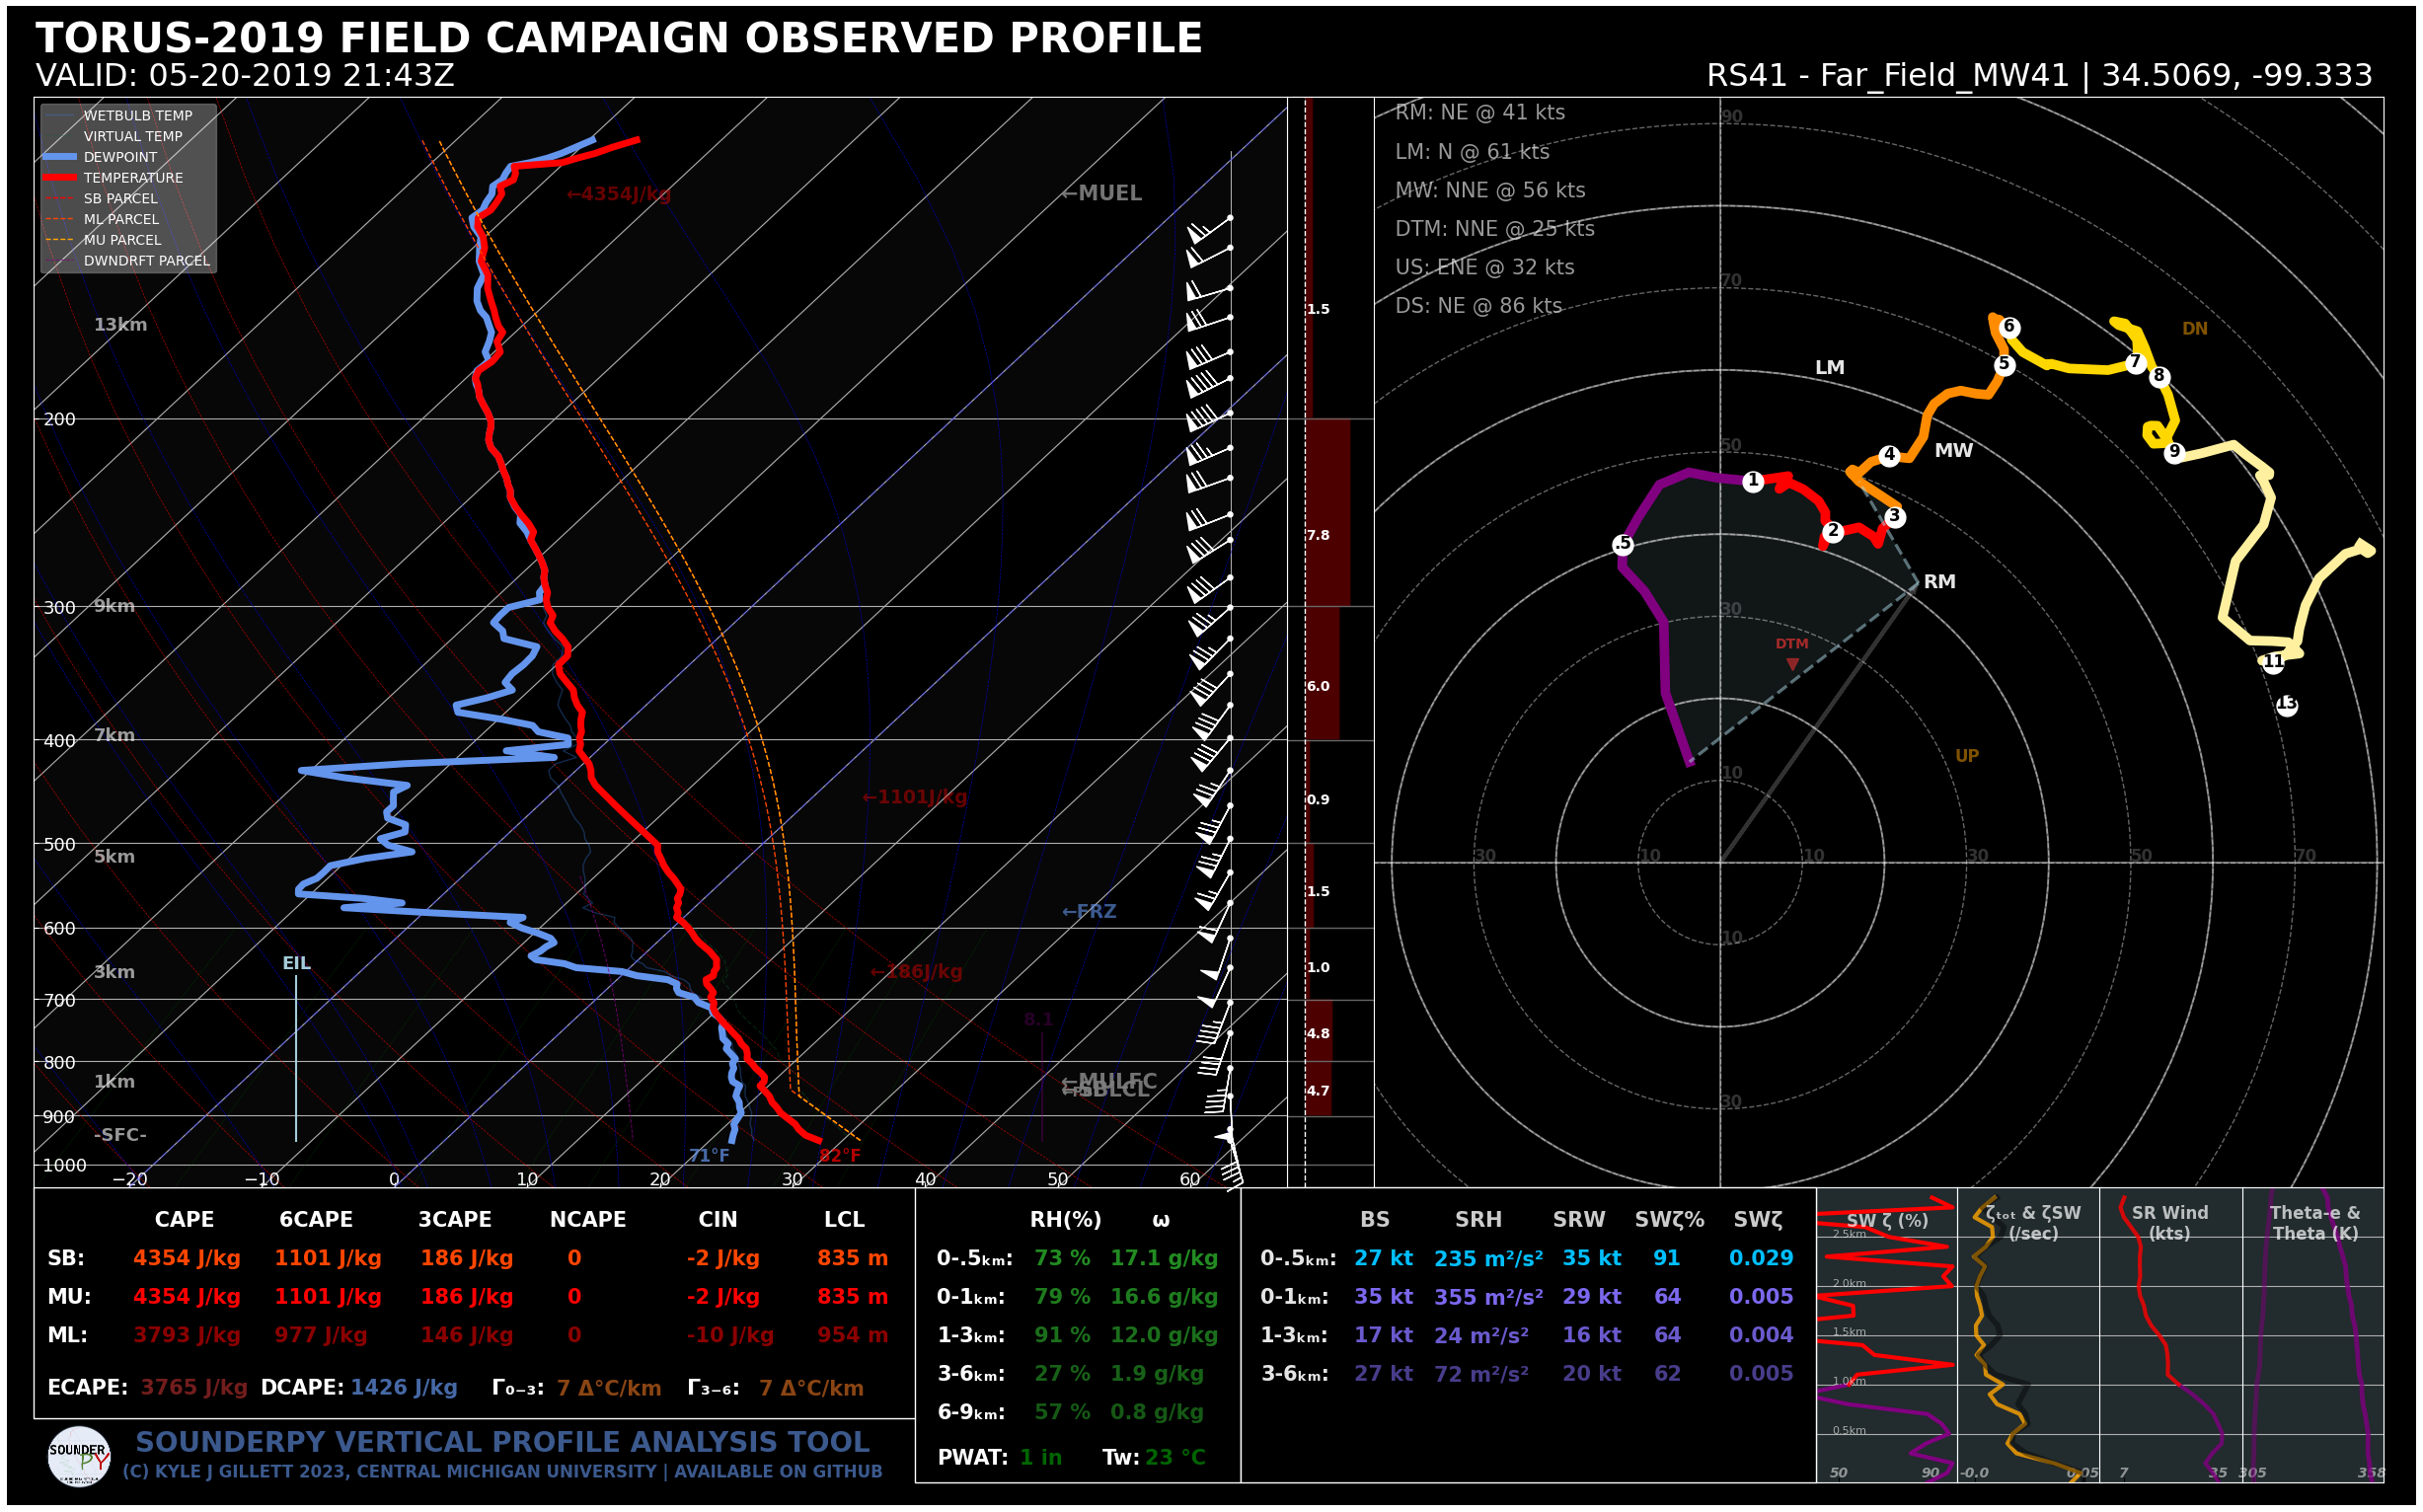

In [11]:
# lets make a sounding!
spy.build_sounding(clean_data, dark_mode=True, color_blind=True)